<a href="https://colab.research.google.com/github/Shyam-S-Mishra/Shyam_S_Mishra_Unsupervised-ML_Capstone_Project_Clustering/blob/main/Shyam_Shubham_Mishra_Unsupervised_ML_Capstone_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


In this project, we are required to do :-  


 * Exploratory Data Analysis

* Understanding what type content is available in different countries

* If Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features

> 
# Let's Begin

>
# Data Exploration

>
## Importing Libraries

In [2]:
# Importing Libraries and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

import string
string.punctuation
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

>
## Dataset Loading

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Importing Dataset 

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering_Capstone_Project_Unsupervised_ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

>
## Dataset First View

In [9]:
# Dataset First Look

dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


>
## Dataset Rows and Columns Count

In [6]:
# Dataset Rows & Columns

dataset.shape

(7787, 12)

>
## Dataset Information

In [7]:
# Dataset Information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


>
## About the Dataset

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. The given dataset has 7787 rows and 12 columns.

>
# Understanding the Variables

In [10]:
# Dataset Columns

dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Description

dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Checking unique values for each variable

dataset.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

>
# Feature Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

>
# Exploratory Data Analysis

In [17]:
# number of values of different categories in 'type' column

dataset['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

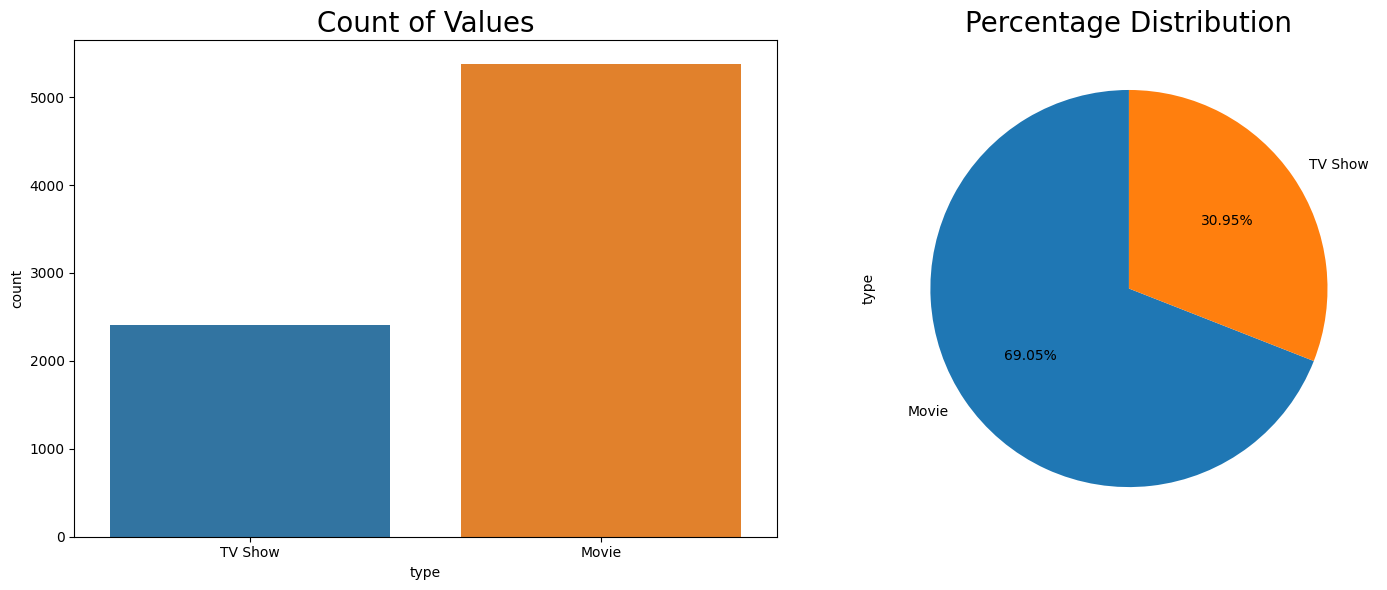

In [18]:
# countplot 

fig,ax = plt.subplots(1,2, figsize=(14,5))
graph = sns.countplot(x = 'type', data = dataset, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart

dataset['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

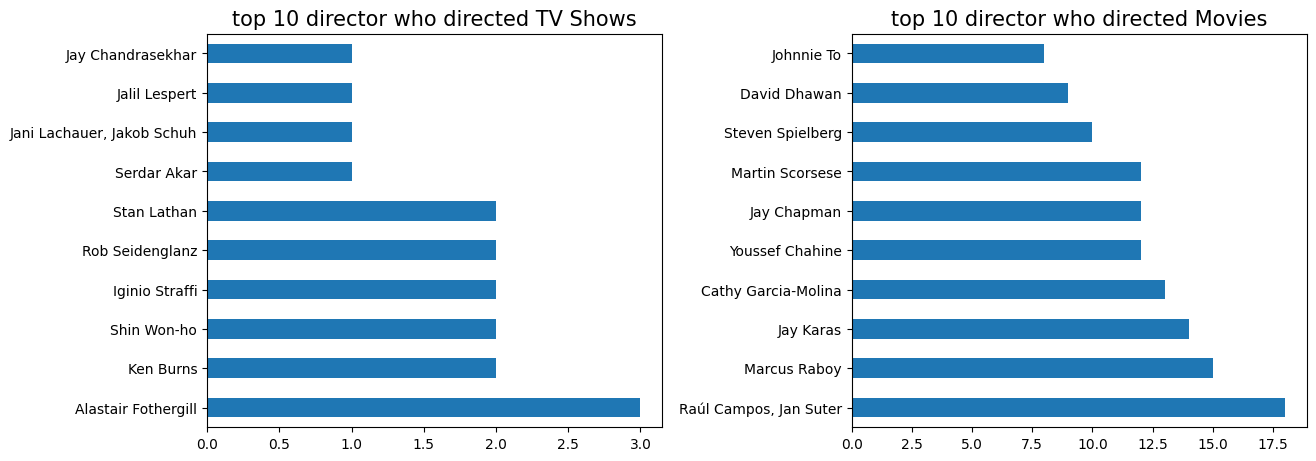

In [22]:
# top 10 directors who have directed most number of TV shows

fig,ax = plt.subplots(1,2, figsize=(14,5))
tv_shows = dataset[dataset['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who have directed most number of Movies

movies = dataset[dataset['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

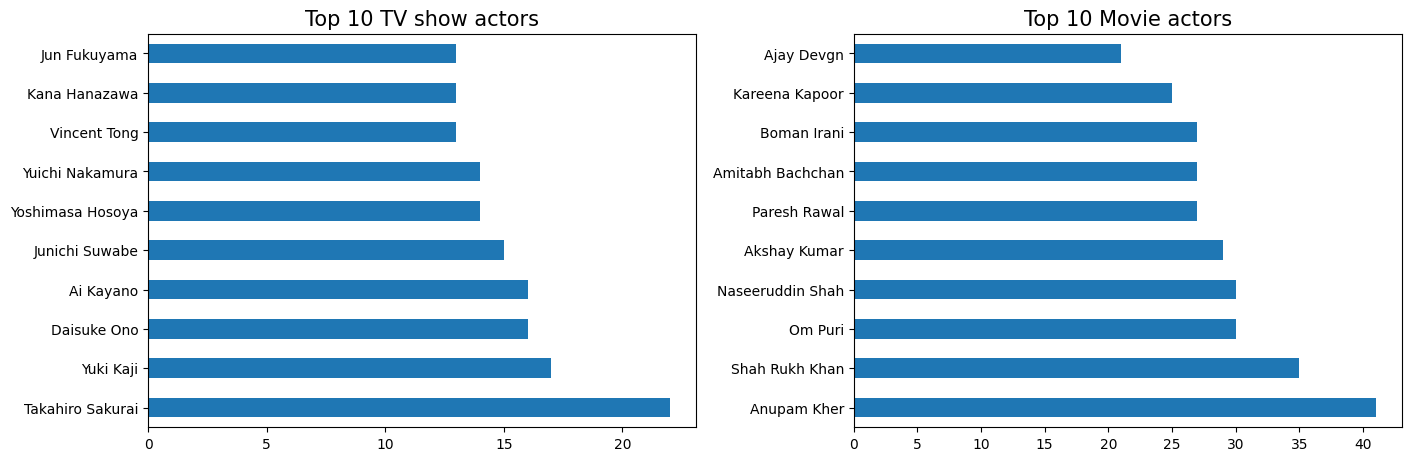

In [23]:
# Separating TV shows actors from cast column

Actors_TV_Show = dataset[dataset['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()

# Top 10 actors who appeared in highest number of TV Show

fig,ax = plt.subplots(1,2, figsize=(15,5))
a = Actors_TV_Show.value_counts()[:10].plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV show actors', size=15)

# Separating movie actors from cast column

Actors_Movies = dataset[dataset['type']=='Movie']['cast'].str.split(', ', expand=True).stack()

# plotting actor who appeared in highest number of Movie
b = Actors_Movies.value_counts()[:10].plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

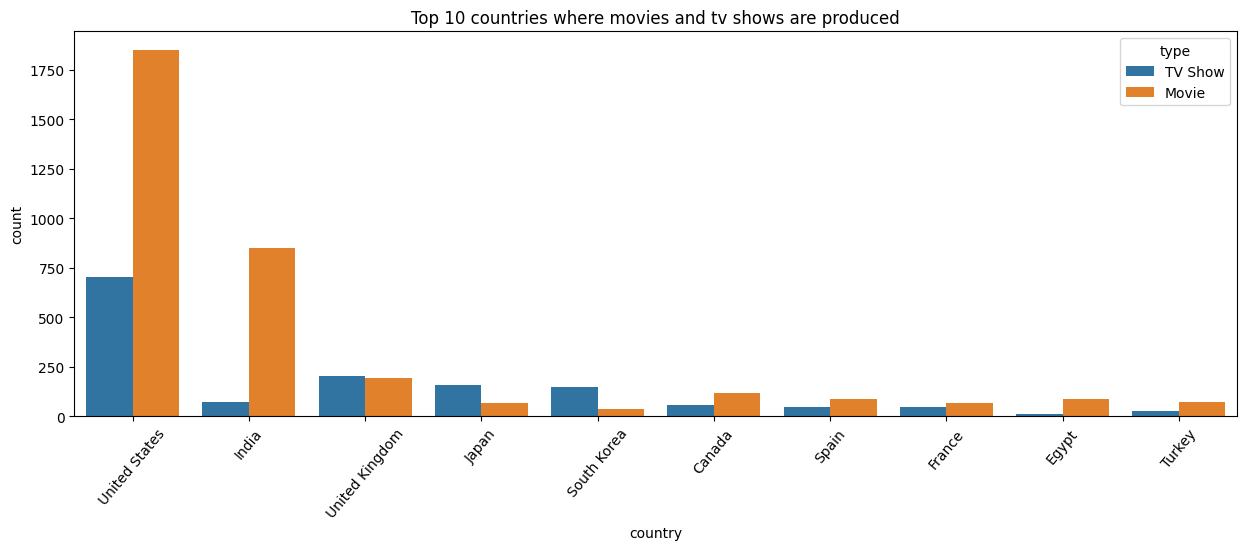

In [28]:
# Top 10 countries where the movies and TV shows were produced 

plt.figure(figsize=(15,5))
sns.countplot(x=dataset['country'],order=dataset['country'].value_counts().index[0:10],hue=dataset['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries where movies and tv shows are produced')
plt.show()

Text(0.5, 1.0, 'distribution by year of release')

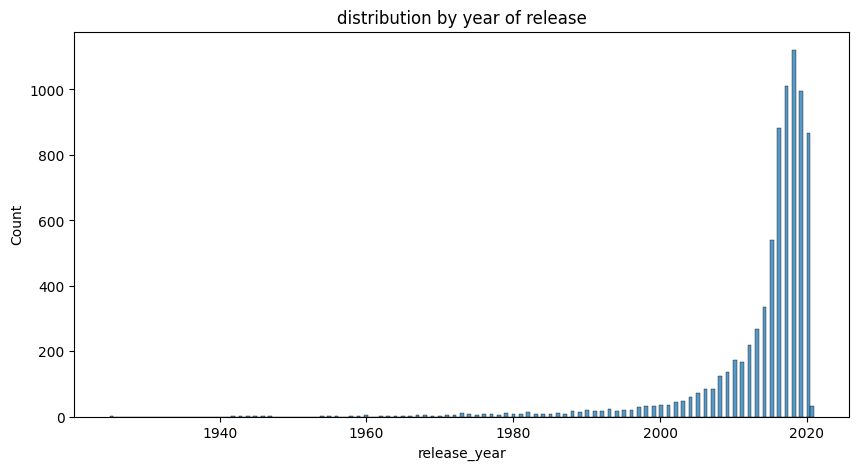

In [30]:
# Visualizing the release year of  the movies and tv shows

plt.figure(figsize=(10,5))
sns.histplot(dataset['release_year'])
plt.title('distribution by year of release')

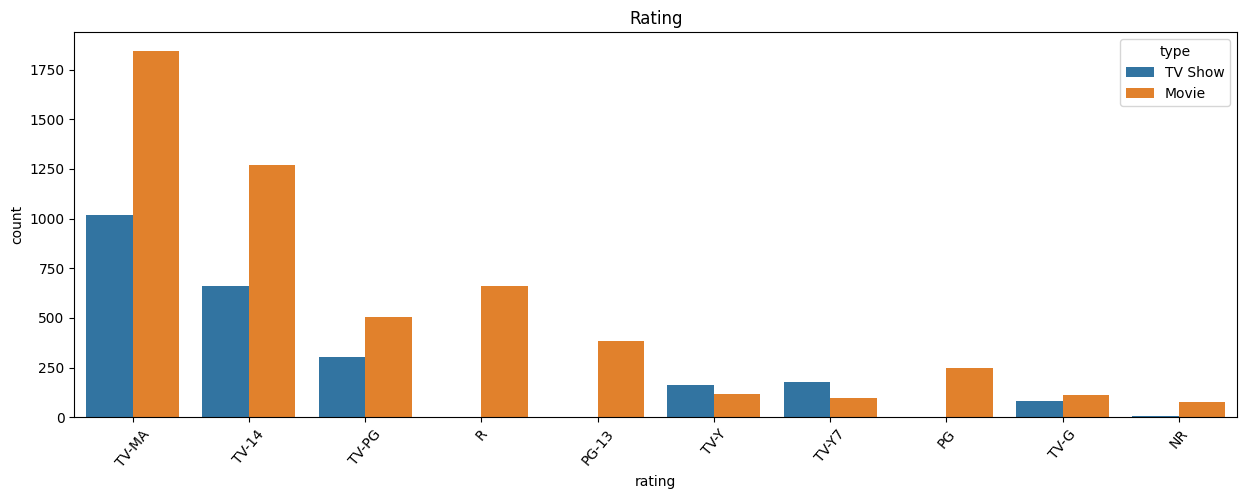

In [31]:
# Visulalizing the rating of the contents available

plt.figure(figsize=(15,5))
sns.countplot(x=dataset['rating'],order=dataset['rating'].value_counts().index[0:10],hue=dataset['type'])
plt.xticks(rotation=50)
plt.title('Rating')
plt.show()

>
# Data Cleaning

>
## Looking for duplicate values

In [33]:
# Counting duplicate values in the dataset 

len(dataset[dataset.duplicated()])

0

>
## Checking for Null Values

In [35]:
# Finding null values in the dataset

print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [38]:
# Handling null Values 

dataset[['director','cast','country']] = dataset[['director','cast','country']].fillna(' ')
dataset.dropna(axis=0, inplace=True)

In [39]:
# checking for null values after treating them

print(dataset.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


>
## Checking for Outliers

<Axes: >

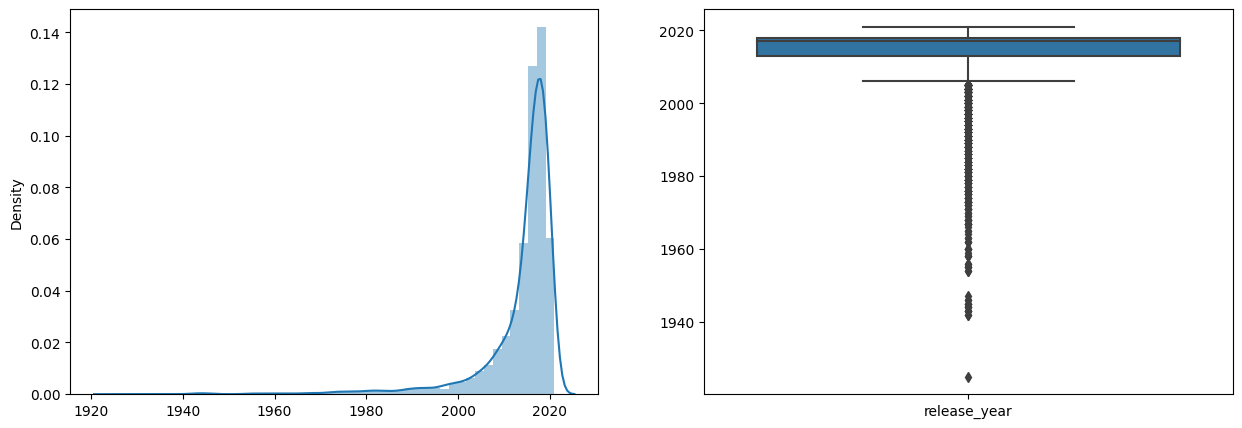

In [40]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(x=dataset['release_year'], ax=ax[0])
sns.boxplot(data=dataset, ax=ax[1])

Except the column release year, rest of all the data are present in text format and for the cluster model we want to build, we need only textual format.  Therefore, there is no need to handle outliers.

>
# Textual Data Preprocessing

**What is textual data preprocessing?**
* Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models.

>
## Selecting Attributes

In [41]:
dataset.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* Listed in (Genere)
* Description

In [42]:
# creating tags column using all text column for model building purpose.

dataset['text_data'] = dataset['director'] + dataset['cast'] + dataset['country'] + \
                     dataset['rating'] + dataset['listed_in'] + dataset['description']
     

In [44]:
# checking the first row

dataset['text_data'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

>
## Removing Stop words and Lower Casing

In natural language processing (NLP) tasks, removing stop words and lowercasing words are common pre-processing steps. 

In [45]:
# creating a set of English stop words

stop_words = stopwords.words('english')

np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [46]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)
     

In [47]:
# applying stopwords function

dataset['text_data'] = dataset['text_data'].apply(stopwords)

In [49]:
# checking the first row again

dataset['text_data'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

>
## Removing Punctuations

Removing punctuation is the process of removing any punctuation marks (e.g., periods, commas, exclamation points, etc.) from text data.

In [50]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [51]:
# applying remove_punctuation function

dataset['text_data'] = dataset['text_data'].apply(remove_punctuation)

In [52]:
# checking the first row after the process
dataset['text_data'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

>
## Stemming

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis.

* We will utilize **SnowballStemmer** to construct a meaningful word from a word corpus.

In [53]:
# create an object of stemming function

stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [55]:
# appying stemming function

dataset['text_data'] = dataset['text_data'].apply(stemming)

In [56]:
# checking the first row after the process

dataset['text_data'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

>
## Text Vectorization

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks.

* We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency

In [61]:
# create the object of tfid vectorizer
# Taking max features = 10000 to prevent system from crashing

tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   

# fit the vectorizer using the text data

tfidf.fit(dataset['text_data'])

# collect the vocabulary items used in the vectorizer

dictionary = tfidf.vocabulary_.items()

In [62]:
#number of independet features created from "text_data" columns

print(len(dictionary)) 

10000


In [63]:
# convert vector into array form for clustering

vector = tfidf.transform(dataset['text_data']).toarray()

# summarize encoded vector

print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')
     

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


>
## Dimensionality Reduction

In [64]:
# using PCA to reduce dimensionality

pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

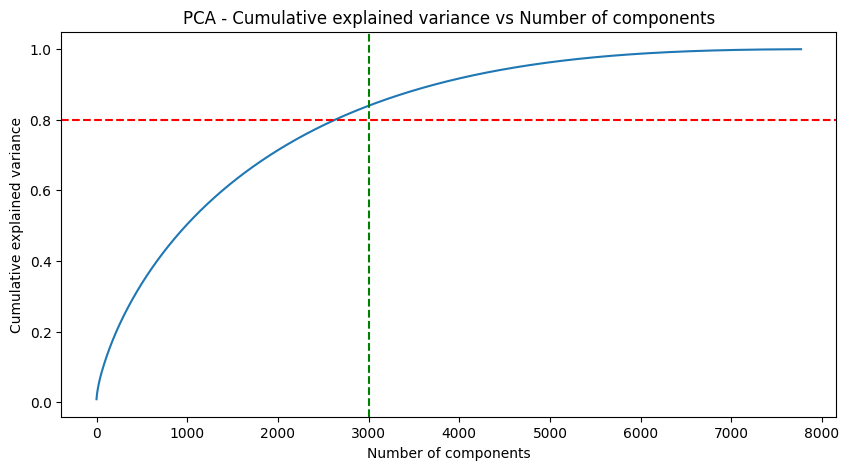

In [65]:
# Explained variance for different number of components

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We discover that approximately 7500 components account for 100 percent of the variance.
* 3000 components alone account for more than 80% of the variance.
* Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [67]:
# reducing the dimensions to 3000 using pca

pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [69]:
# transformed features

X = pca.transform(vector)

# shape of transformed vectors

X.shape

(7770, 3000)